# DATA WRANGLING PROJECT

# Importing Libraries

In [279]:
import pandas as pd
import numpy as np
import requests # to download provided file
import json
import os
import tweepy
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
# import csv

from timeit import default_timer as timer




# Gather

## Manually downloading provided file

In [280]:
# creating dataframe from uploaded provided file with Twitter Archive

df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [281]:
# to check that we successfully downloaded the twitter archive
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Programmatically downloading the file

In [282]:
# the url with the file
tsv_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 

In [283]:
# to download image prediction using python requests
file_image_predict = requests.get(tsv_url)

In [284]:
# to save file
with open('image-predictions.tsv', 'wb') as file:
    file.write(file_image_predict.content)

In [285]:
# creating pandas dataframe
df_image_predict = pd.read_csv('image-predictions.tsv', sep='\t')

In [286]:
# to check that we successfully downloaded the image prediction file
df_image_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Query the Twitter API for each tweet's JSON data using Python's Tweepy library


In [287]:
# https://stackoverflow.com/questions/26701311/retrieving-twitter-data-using-tweepy

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


In [288]:
# changinf the type of `tweet_id` column to str to be able to use as a key in api request
df_archive['tweet_id'] = df_archive['tweet_id'].astype(str)

In [289]:
# to check that we changed the type
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [290]:
# need to get tweet ids to extract their info using Twitter API
tweet_ids = df_archive["tweet_id"].astype(list)

In [291]:
# to check that we got all `tweet_id` from df_archive
len(tweet_ids)

2356

In [49]:
# create new array for tweets

tweet_array = []

In [111]:
# the code provided by Udacity in the description
# I've added the array to collect tweets to be able to chech the array length right away
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            tweet_array.append(tweet)
#             print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
2: 892177421306343426
3: 891815181378084864
4: 891689557279858688
5: 891327558926688256
6: 891087950875897856
7: 890971913173991426
8: 890729181411237888
9: 890609185150312448
10: 890240255349198849
11: 890006608113172480
12: 889880896479866881
13: 889665388333682689
14: 889638837579907072
15: 889531135344209921
16: 889278841981685760
17: 888917238123831296
18: 888804989199671297
19: 888554962724278272
20: 888202515573088257
Fail
21: 888078434458587136
22: 887705289381826560
23: 887517139158093824
24: 887473957103951883
25: 887343217045368832
26: 887101392804085760
27: 886983233522544640
28: 886736880519319552
29: 886680336477933568
30: 886366144734445568
31: 886267009285017600
32: 886258384151887873
33: 886054160059072513
34: 885984800019947520
35: 885528943205470208
36: 885518971528720385
37: 885311592912609280
38: 885167619883638784
39: 884925521741709313
40: 884876753390489601
41: 884562892145688576
42: 884441805382717440
43: 884247878851493888
44: 88416267058

In [112]:
# to check how many id failed to get data from twitter
len(fails_dict)

16

In [292]:
# reading text from txt to dataframe
tweets_df = []
with open('tweet_json.txt') as file:
    for line in file:
        try:
            tweet = json.loads(line)
            tweets_df.append(tweet)
        except:
            continue
            

In [293]:
# to create pandas dataframe 
df_tweepy = pd.DataFrame(tweets_df, columns=list(tweets_df[0].keys()))

In [294]:
# to check that we successfully querried data from Twitter
df_tweepy.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8314,38018,False,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,6142,32637,False,False,False,False,en
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,4067,24561,False,False,False,False,en


## Assess

#### Archive dataframe

In [295]:
# to check types and size
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [296]:
df_archive.shape

(2356, 17)

In [297]:
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
111,871032628920680449,NaN,NaN,2017-06-03 15:55:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Boomer. He's doing an advanced water t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871032628...,13,10,Boomer,None,None,None,None
2330,666362758909284353,NaN,NaN,2015-11-16 21:10:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unique dog here. Very small. Lives in containe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666362758...,6,10,None,None,None,None,None
975,750041628174217216,NaN,NaN,2016-07-04 19:00:33 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Beau. He's trying to keep his daddy fr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750041628...,13,10,Beau,None,None,None,None
1882,674999807681908736,6.747934e+17,4.196984e+09,2015-12-10 17:11:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ok last one of these. I may try to make some m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674999807...,13,10,None,None,None,None,None
976,750026558547456000,NaN,NaN,2016-07-04 18:00:41 +0000,"<a href=""https://about.twitter.com/products/tw...",Meet Jax &amp; Jil. Jil is yelling the pledge ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750026558...,10,10,Jax,None,None,None,None


In [298]:
# to check how many entries are retweeted posts (not `NaN`)
df_archive.retweeted_status_id.notnull().value_counts()

False    2175
True      181
Name: retweeted_status_id, dtype: int64

In [299]:
# to check what is inside `text` variable
df_archive.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [300]:
# check if `rating denominator` is always 10

len(df_archive.loc[df_archive['rating_denominator'] != 10])

23

In [301]:
len(df_archive.loc[df_archive['name'] == 'None'])

745

In [302]:
# to check if there is any duplicated entries
len(df_archive[df_archive.duplicated() != False])

0

`df_archive` dataframe has:
- 2356 rows
- 17 variables (columns)

Quality:

- many columns have missing data as:
    `in_reply_to_status_id`,
    `in_reply_to_user_id`,
    `retweeted_status_id`,
    `retweeted_status_user_id`,
    `retweeted_status_timestamp`,
    `expanded_urls`
 - `name` looks like it has all values but visual check shows that there are many `None` (745 rows) or articles without names as `an`
 - `rating_denominator` is not always `10`, in fact it's not `10` in 23 cases
 - `rating_numerator` is integer, so not catching properly decimal values
 - wrong `rating_demominator` means wrong score
 - `doggo`, `floofer`, `pupper`,`puppo` columns show 2356 values but many of them are `None`, and visual assessment shows we have many of them.
 - `tweet_id` is integer instead of string
 - 181 retweeted posts
 - there are no duplicated entries
 
Tydiness:

- `doggo`, `floofer`, `pupper`,`puppo` columns have to be converted into one column with dog's state instead of four. It also would make able to see missing states

- the same information `tweet_id` are in the different datasets. Should be combined into one.

Suggestion:

- `timestamp` needed to be converted to `date` and `time`




#### Image Prediction Dataframe

In [303]:
# to check types and the size
df_image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [304]:
df_image_predict.shape

(2075, 12)

In [305]:
# to check that all rows have photo
len(df_image_predict.loc[df_image_predict['jpg_url'] == 'None'])

0

In [306]:
# to check how many times additional image required to identify the breed
len(df_image_predict.loc[df_image_predict['img_num'] != 1])

295

In [307]:
df_image_predict.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1626,804026241225523202,https://pbs.twimg.com/media/Cyh5mQTW8AQpB6K.jpg,1,web_site,0.492709,False,envelope,0.050566,False,guillotine,0.015297,False
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1392,767122157629476866,https://pbs.twimg.com/media/CqVdiBJWIAEDZB4.jpg,2,toy_poodle,0.873841,True,miniature_poodle,0.059192,True,Irish_terrier,0.035306,True
1815,833826103416520705,https://pbs.twimg.com/media/C5JYaYoVYAAcEQw.jpg,1,Chihuahua,0.438054,True,kelpie,0.149706,True,Pembroke,0.096480,True
1784,829141528400556032,https://pbs.twimg.com/media/C4GzztSWAAA_qi4.jpg,2,golden_retriever,0.573140,True,cocker_spaniel,0.111159,True,gibbon,0.094127,False


In [308]:
# to check in how many cases with `p1_cong` less than `0.5` the image was dog
unlikely_dog = 0
for index, row in df_image_predict.iterrows():
    if (row['p1_conf'] < 0.5 and  row['p1_dog'] == True):
        unlikely_dog +=1 

unlikely_dog

559

In [309]:
# to check in how many cases we don't have boolean value in `p1_dog`
len(df_image_predict.loc[df_image_predict['p1_dog'] != True])

543

In [310]:
# to check what we have if we don't have boolean in `p1_dog`
df_image_predict.loc[df_image_predict['p1_dog'] != True].sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1722,819711362133872643,https://pbs.twimg.com/media/C2AzHjQWQAApuhf.jpg,2,acorn_squash,0.848704,False,toilet_seat,0.044348,False,toy_poodle,0.022009,True
73,667369227918143488,https://pbs.twimg.com/media/CUL4xR9UkAEdlJ6.jpg,1,teddy,0.709545,False,bath_towel,0.127285,False,Christmas_stocking,0.028568,False
1284,750506206503038976,https://pbs.twimg.com/media/CmpVaOZWIAAp3z6.jpg,1,American_black_bear,0.219166,False,lesser_panda,0.214715,False,titi,0.091685,False
315,671735591348891648,https://pbs.twimg.com/media/CVJ79MzW4AEpTom.jpg,2,stone_wall,0.271121,False,Irish_wolfhound,0.063078,True,poncho,0.048226,False
337,672231046314901505,https://pbs.twimg.com/media/CVQ-kfWWoAAXV15.jpg,1,killer_whale,0.823919,False,grey_whale,0.036601,False,hammerhead,0.029522,False


In [311]:
# to check in how many cases program identified `False` in every try
len(df_image_predict[(df_image_predict["p1_dog"] == False) &
         (df_image_predict["p2_dog"] == False) &
         (df_image_predict["p3_dog"] == False)])

324

In [312]:
# to check what is the picture if the program identified `False` in every try
df_image_predict[(df_image_predict["p1_dog"] == False) &
         (df_image_predict["p2_dog"] == False) &
         (df_image_predict["p3_dog"] == False)].sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
307,671533943490011136,https://pbs.twimg.com/media/CVHEju0XAAEUZRY.jpg,1,hen,0.556524,False,cock,0.442033,False,black_swan,0.001181,False
1064,715360349751484417,https://pbs.twimg.com/media/Ce14cOvWwAAcFJH.jpg,1,nail,0.855552,False,screw,0.073277,False,padlock,0.023970,False
140,668544745690562560,https://pbs.twimg.com/media/CUcl5jeWsAA6ufS.jpg,1,bearskin,0.427870,False,bow,0.258858,False,panpipe,0.021563,False
870,697881462549430272,https://pbs.twimg.com/media/Ca9feqDUAAA_z7T.jpg,1,washbasin,0.176423,False,paper_towel,0.167462,False,toilet_tissue,0.098029,False
117,668142349051129856,https://pbs.twimg.com/media/CUW37BzWsAAlJlN.jpg,1,Angora,0.918834,False,hen,0.037793,False,wood_rabbit,0.011015,False


In [313]:
# to check if there is any duplicated entries
len(df_image_predict[df_image_predict.duplicated() != False])

0

In [314]:
# to check how many times `p1_dog` is False
len(df_image_predict[(df_image_predict["p1_dog"] == False)])

543

In [315]:
# to check how many times then `p1_dog` is False but `p2_dog` and `p3_dog` were True
len(df_image_predict[(df_image_predict["p1_dog"] == False) &
         (df_image_predict["p2_dog"] == True) &
         (df_image_predict["p3_dog"] == True)])

101

In [316]:
# to check cases when `p1_dog` is False but `p2_dog` and `p3_dog` were True
(df_image_predict[(df_image_predict["p1_dog"] == False) &
         (df_image_predict["p2_dog"] == True) &
         (df_image_predict["p3_dog"] == True)])

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True
103,667806454573760512,https://pbs.twimg.com/media/CUSGbXeVAAAgztZ.jpg,1,toyshop,0.253089,False,Chihuahua,0.187155,True,Brabancon_griffon,0.112799,True
108,667878741721415682,https://pbs.twimg.com/media/CUTILFiWcAE8Rle.jpg,1,seat_belt,0.200373,False,miniature_pinscher,0.106003,True,schipperke,0.104733,True
133,668480044826800133,https://pbs.twimg.com/media/CUbrDWOWcAEyMdM.jpg,1,Arctic_fox,0.119243,False,Labrador_retriever,0.099965,True,pug,0.086717,True
167,668986018524233728,https://pbs.twimg.com/media/CUi3PIrWoAAPvPT.jpg,1,doormat,0.976103,False,Chihuahua,0.005640,True,Norfolk_terrier,0.003913,True
171,668994913074286592,https://pbs.twimg.com/media/CUi_UtnWIAEtfqz.jpg,1,hog,0.113789,False,English_springer,0.089763,True,French_bulldog,0.082186,True
183,669353438988365824,https://pbs.twimg.com/media/CUoFZTyW4AE70iD.jpg,1,teddy,0.379656,False,Pembroke,0.212343,True,chow,0.096995,True
198,669625907762618368,https://pbs.twimg.com/media/CUr9NjgU8AEpf5w.jpg,1,seat_belt,0.874502,False,golden_retriever,0.055408,True,Labrador_retriever,0.026854,True


As we see, if `p1_dog` is False but the rest of predictions were True, we should trust `p1_dog1`

`df_image_predict` dataframe has:
- 2075 rows,
- 12 variables (columns)
- all variables shown as having all values

Quality:
- `tweet_id` is an integer instead of a string
-  295 rows have more than 1 photo ( as 0 has 0 photos)
-  559 cases when with probability of `p1_conf` less than `0.5` the picture was the picture of a dog
- in 543 cases in `p1_dog` there is totally different animal with hight `p1_conf` probability
- in 101 cases when `p1_dog` was False, but `p2_dog` and `p3_dog` were True, it was not a dog, so `p1_dog` False was correct
- in 324 cases there were `False` in all `p1_dog`, `p2_dog`, `p3_dog` and it was correct assessment of a photo
- there are no duplicated entries

Tydiness:
- though we have 9 columns with `breed` and if it's a dog prediction it's very inconvenient and unclear to read, need column which says right away if it's dog and what is the bread




#### Twitter API dataframe

In [317]:
# to check types and the size
df_tweepy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 27 columns):
created_at                       2340 non-null object
id                               2340 non-null int64
id_str                           2340 non-null object
full_text                        2340 non-null object
truncated                        2340 non-null bool
display_text_range               2340 non-null object
entities                         2340 non-null object
extended_entities                2067 non-null object
source                           2340 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null object
in_reply_to_screen_name          77 non-null object
user                             2340 non-null object
geo                              0 non-null object
coordinates                      0 non-null

In [318]:
df_tweepy.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8314,38018,False,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,6142,32637,False,False,False,False,en
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,4067,24561,False,False,False,False,en
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8458,41367,False,False,False,False,en
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,9157,39548,False,False,False,False,en


In [319]:
df_tweepy.full_text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

Quality:
- comparing to 2356 `tweet_id` in `df_archive` file we could get data only for 2340 ids. 16 ids failed.
- `tweet_id` is labeled as `id`
- `id` is an integer, not string, but `id_str` is string
- there are no duplicated entries

Tydiness:
- the same information `tweet_id` are in the different datasets. Should be combined into one.
- there are almost the same information in `text` in `df_archive` and in `full_text` in `df_tweepy`, the abundand one should be eliminated.


Suggestion:

- `created_at` need to be converted to `date` and `time`

## Clean

### Creating copies for cleaning

In [320]:
df_archive_clean = df_archive.copy()
df_predict_clean = df_image_predict.copy()
df_tweepy_clean = df_tweepy.copy()

### Define


- convert `tweet_id` into string in `df_archive` and `df_image_predict`
- in `df_tweepy` change column name from `id_str` into `tweet_id`
- eliminate unnecessary `tweet_id` columns in each set by merging sets together on `tweet_id`
- there are almost the same information in `text` and in `full_text`, the abundand one should be eliminated.
- drop unnecessary columns. Many of then have missing values
- convert `timestamp` from `df_archive` and `df_tweepy` into `date` and `time` variables
- remove retweeted rows
- remove rows where `p1_dog`, `p2_dog`, `p3_dog` are False, they are not dogs
- remove rows where `p1_dog` is False, but `p2_dog` and `p3_dog` are True, they are not dogs
- make inner join of all tables, joining only ids which are present in all 3 dataframes
- ids from `failed_id` should be removed
- extract `rating_denominator`  from the `text` 
- convert `rating_denominator` to float
- check correct `rating_numerator` and `rating_denominator` in `"full_text"` column as `Total Score`
- calculate correct `score` by `rating_numerator`/ `rating_denominator`
- `doggo`, `floofer`, `pupper`, `puppo` columns have many missing values which are not easy identifiable as shown as `None`. These 4 columns have to be collapsed into one column `dog_state` which would make able to see missing states.





In [321]:
df_tweepy_clean['tweet_id'] = df_tweepy_clean['id_str']

In [322]:
# to check that we added `tweet_id`
df_tweepy_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 28 columns):
created_at                       2340 non-null object
id                               2340 non-null int64
id_str                           2340 non-null object
full_text                        2340 non-null object
truncated                        2340 non-null bool
display_text_range               2340 non-null object
entities                         2340 non-null object
extended_entities                2067 non-null object
source                           2340 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null object
in_reply_to_screen_name          77 non-null object
user                             2340 non-null object
geo                              0 non-null object
coordinates                      0 non-null

In [323]:
# drop redundant columns
df_tweepy_clean = df_tweepy_clean.drop(['id', 'id_str', 'user', 'coordinates', 'truncated', 'retweeted', 'favorited', 'display_text_range', 'entities', 'extended_entities', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'geo', 'place','contributors', 'is_quote_status' , 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang', 'source'],axis=1)

In [324]:
df_tweepy_clean.columns

Index(['created_at', 'full_text', 'retweet_count', 'favorite_count',
       'tweet_id'],
      dtype='object')

In [325]:
# to convert timestamp into date and time
for z in df_tweepy_clean.created_at:
    df_tweepy_clean['created_at'] = pd.to_datetime(z)

In [326]:
df_tweepy_clean['date'] = [datetime.datetime.date(d) for d in df_tweepy_clean['created_at']]

In [327]:
df_tweepy_clean['time'] = [datetime.datetime.time(d) for d in df_tweepy_clean['created_at']]

In [328]:
df_tweepy_clean.head()

,created_at,full_text,retweet_count,favorite_count,tweet_id,date,time
0,2015-11-15 22:32:08,This is Phineas. He's a mystical boy. Only eve...,8314,38018,892420643555336193,2015-11-15,22:32:08
1,2015-11-15 22:32:08,This is Tilly. She's just checking pup on you....,6142,32637,892177421306343426,2015-11-15,22:32:08
2,2015-11-15 22:32:08,This is Archie. He is a rare Norwegian Pouncin...,4067,24561,891815181378084864,2015-11-15,22:32:08
3,2015-11-15 22:32:08,This is Darla. She commenced a snooze mid meal...,8458,41367,891689557279858688,2015-11-15,22:32:08
4,2015-11-15 22:32:08,This is Franklin. He would like you to stop ca...,9157,39548,891327558926688256,2015-11-15,22:32:08


In [329]:
# to drop `created_at` column
df_tweepy_clean = df_tweepy_clean.drop('created_at', axis=1)

In [330]:
df_tweepy_clean.full_text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [331]:
df_archive_clean.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [332]:
df_archive.expanded_urls[0]

'https://twitter.com/dog_rates/status/892420643555336193/photo/1'

In [333]:
# df_archive_clean = df_archive.copy()

In [334]:
# change all denominators to 10
for den in df_archive_clean:
    df_archive_clean["rating_denominator"] = 10

In [335]:
len(df_archive_clean.loc[df_archive_clean['rating_denominator'] != 10])

0

In [336]:
df_archive_clean.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [337]:
# to select only rows which containt `text` with rating information

df_archive_clean = df_archive_clean[df_archive_clean.text.str.contains("\d+/10")].copy()

# extract numerators and denominators via regex

df_archive_clean_rating = df_archive_clean.text.str.extract("(\d+/10)", expand=False).copy()

# extract numerator and convert to inreger
df_archive_clean["rating_numerator"] = df_archive_clean_rating.apply(lambda x: int(str(x)[:-3]))

In [338]:
df_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [339]:
# calculate correct score
df_archive_clean["score"] = (df_archive_clean["rating_numerator"] / df_archive_clean["rating_denominator"])

In [340]:
# drop `rating_numerator` and `rating_denominator` columns
df_archive_clean.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

In [341]:
# collapse `doggo`, `puppo`, `floofer`, `pupper` into one column `dog_type`

df_archive_clean['dog_type'] = df_archive_clean[['puppo', 'doggo', 'pupper', 'floofer']]\
    .apply(lambda x: '-'.join(str(value) for value in x), axis=1)

Now we see that many `dog_type` entries are empty, need to find all variants

In [342]:
# all values from `dog_type`
df_archive_clean.dog_type.value_counts()

None-None-None-None        1960
None-None-pupper-None       245
None-doggo-None-None         83
puppo-None-None-None         29
None-doggo-pupper-None       12
None-None-None-floofer        9
puppo-doggo-None-None         1
None-doggo-None-floofer       1
Name: dog_type, dtype: int64

Change `dog_type` based on the type

In [343]:
df_archive_clean['dog_type'].replace('None-None-None-None', 'NaN', inplace=True)
df_archive_clean['dog_type'].replace('None-None-pupper-None', 'pupper', inplace=True)
df_archive_clean['dog_type'].replace('None-doggo-None-None', 'doggo', inplace=True)
df_archive_clean['dog_type'].replace('None-doggo-pupper-None', 'doggo, pupper', inplace=True)
df_archive_clean['dog_type'].replace('None-None-None-floofer', 'floofer', inplace=True)
df_archive_clean['dog_type'].replace('puppo-doggo-None-None', 'puppo, doggo', inplace=True)
df_archive_clean['dog_type'].replace('None-doggo-None-floofer', 'doggo, floofer', inplace=True)
df_archive_clean['dog_type'].replace('puppo-None-None-None', 'puppo', inplace=True)


In [344]:
# all values from `dog_type`
df_archive_clean.dog_type.value_counts()

NaN               1960
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, floofer       1
puppo, doggo         1
Name: dog_type, dtype: int64

In [345]:
# drop redundant columns
df_archive_clean.drop(['pupper', 'doggo', 'puppo', 'floofer'], axis=1, inplace=True)

In [346]:
df_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'name', 'score',
       'dog_type'],
      dtype='object')

In [347]:
df_archive_clean.retweeted_status_id.notnull().value_counts()

False    2159
True      181
Name: retweeted_status_id, dtype: int64

In [348]:
# drop retweeted rows

df_archive_clean = df_archive_clean[pd.isnull(df_archive_clean['retweeted_status_id'])]

In [349]:
# test 
df_archive_clean.retweeted_status_id.notnull().value_counts()

False    2159
Name: retweeted_status_id, dtype: int64

In [350]:
df_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,score,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,NaN


In [351]:
# extract names from the text

# need to find 'This is <name>' and remove rows that do not have it.
# df_name = df_archive_clean['text'].str.contains('This is ([A-Z][a-z]+).')

# add column with name
# df_archive_clean = df_archive_clean[df_name].copy()

# Extract names
# df_archive_clean['name'] = df_archive_clean.text.str.extract('This is ([A-Z][a-z]+).', expand=False)

In [352]:
df_archive_clean.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [353]:
df_archive_clean['text'].str.contains('This is ([A-Z][a-z]+).').value_counts()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


False    1083
True     1076
Name: text, dtype: int64

In [354]:
df_archive_clean['text'][2328]

'Oh goodness. A super rare northeast Qdoba kangaroo mix. Massive feet. No pouch (disappointing). Seems alert. 9/10 https://t.co/Dc7b0E8qFE'

As we see half of dogs don't have names. 
I don't want to delete them as they have breed information.


In [355]:
# df_archive_clean['name'] = df_archive_clean[df_archive_clean['text']
#                             .str.contains('This is ([A-Z][a-z]+).')]

In [356]:
df_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' ], axis=1, inplace=True)

In [357]:
df_archive_clean.head()

,tweet_id,text,expanded_urls,name,score,dog_type
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,NaN
1,892177421306343426,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,NaN
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,NaN
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,NaN
4,891327558926688256,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,NaN


In [358]:
df_archive_clean[df_archive_clean['text']
                            .str.contains('This is ([A-Z][a-z]+).')]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,expanded_urls,name,score,dog_type
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,NaN
1,892177421306343426,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,NaN
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,NaN
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,NaN
4,891327558926688256,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,NaN
8,890609185150312448,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,1.3,NaN
9,890240255349198849,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,1.4,doggo
10,890006608113172480,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,Koda,1.3,NaN
11,889880896479866881,This is Bruno. He is a service shark. Only get...,https://twitter.com/dog_rates/status/889880896...,Bruno,1.3,NaN
13,889638837579907072,This is Ted. He does his best. Sometimes that'...,https://twitter.com/dog_rates/status/889638837...,Ted,1.2,NaN


In [359]:
# to check how many entries have names in `df_tweepy`

len(df_tweepy_clean[df_tweepy_clean['full_text'].str.contains('This is ([A-z][a-z]+)')])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


1208

In [360]:
df_predict_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

Based on previous assessment if `p1_dog` == True it's always true, so we don't need the rest parameters
So we'd take `p1` breed as correct

In [361]:
df_predict_clean['breed'] = df_predict_clean['p1']

In [362]:
df_predict_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],  axis=1, inplace= True)

In [363]:
df_predict_clean.head()

,tweet_id,jpg_url,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher


In [364]:
df_tweepy_clean.columns

Index(['full_text', 'retweet_count', 'favorite_count', 'tweet_id', 'date',
       'time'],
      dtype='object')

In [365]:
df_predict_clean.tweet_id = df_predict_clean['tweet_id'].astype(str) 

In [366]:
df_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 3 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
breed       2075 non-null object
dtypes: object(3)
memory usage: 48.7+ KB


In [367]:
# to merge `df_archive_clean` to `df_predict_clean` on `tweet_id`
df_temp_one = df_archive_clean.merge(df_predict_clean, how="inner", on="tweet_id").copy()


In [368]:
# to merge `df_temp_one` to `df_tweepy_clean` on `tweet_id`
df_clean = df_temp_one.merge(df_tweepy_clean, how="inner", on="tweet_id").copy() 

In [369]:
df_clean.duplicated().value_counts()

False    1979
dtype: int64

In [370]:
# to extract names from full text
df_clean['name'] = df_clean.full_text.str.extract("This is ([A-Z][a-z]+).")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [371]:
df_clean.head()

,tweet_id,text,expanded_urls,name,score,dog_type,jpg_url,breed,full_text,retweet_count,favorite_count,date,time
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,This is Phineas. He's a mystical boy. Only eve...,8314,38018,2015-11-15,22:32:08
1,892177421306343426,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,This is Tilly. She's just checking pup on you....,6142,32637,2015-11-15,22:32:08
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,This is Archie. He is a rare Norwegian Pouncin...,4067,24561,2015-11-15,22:32:08
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,This is Darla. She commenced a snooze mid meal...,8458,41367,2015-11-15,22:32:08
4,891327558926688256,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,This is Franklin. He would like you to stop ca...,9157,39548,2015-11-15,22:32:08


In [372]:
# to test duplicated `tweet_id`
bool_series_id = df_clean['tweet_id'].duplicated() 

In [373]:
# to test duplicated `text`
bool_series_text = df_clean['text'].duplicated() 

In [374]:
bool_series_id.value_counts()

False    1979
Name: tweet_id, dtype: int64

In [375]:
bool_series_text.value_counts()

False    1979
Name: text, dtype: int64

### Store clean dataframe to csv

In [376]:
# store clean dataframe to csv file
df_clean.to_csv('twitter_archive_master.csv', index=False)

As we see we don't have duplicates in `df_clean`

## Data Analysis


In [377]:
df_clean = pd.read_csv('twitter_archive_master.csv')

In [378]:
df_clean.head()

,tweet_id,text,expanded_urls,name,score,dog_type,jpg_url,breed,full_text,retweet_count,favorite_count,date,time
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,This is Phineas. He's a mystical boy. Only eve...,8314,38018,2015-11-15,22:32:08
1,892177421306343426,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,This is Tilly. She's just checking pup on you....,6142,32637,2015-11-15,22:32:08
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,This is Archie. He is a rare Norwegian Pouncin...,4067,24561,2015-11-15,22:32:08
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,This is Darla. She commenced a snooze mid meal...,8458,41367,2015-11-15,22:32:08
4,891327558926688256,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,This is Franklin. He would like you to stop ca...,9157,39548,2015-11-15,22:32:08


We will analyze and visualize next variables:

- `name` - most popular name
- `breed` - most poular breed
- `score` - most popular rating
- `dog_type` - most popular dog stage
- `retweet_count`
- `favorite_count`


In [379]:
# grouping by breed

df_clean.breed.value_counts()

golden_retriever             136
Labrador_retriever            92
Pembroke                      88
Chihuahua                     79
pug                           54
chow                          41
Samoyed                       39
Pomeranian                    38
toy_poodle                    38
malamute                      29
cocker_spaniel                27
French_bulldog                25
Chesapeake_Bay_retriever      23
miniature_pinscher            22
seat_belt                     21
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     19
Shetland_sheepdog             18
Maltese_dog                   18
Eskimo_dog                    18
beagle                        17
Shih-Tzu                      17
teddy                         17
Cardigan                      17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
Lakeland_terrier              16
web_site                      15
          

In [380]:
# grouping by names 
df_clean.name.value_counts()

Cooper        9
Lucy          9
Penny         8
Oliver        8
Tucker        8
Charlie       7
Bella         6
Bo            6
Koda          5
Oscar         5
Scout         5
Buddy         5
Lola          5
Louis         5
Daisy         4
Gus           4
Bailey        4
Toby          4
Alfie         4
Chip          4
Jerry         4
Cassie        4
Leo           4
Sadie         4
Finn          4
Dexter        4
Stanley       4
Archie        4
Clark         4
Derek         4
             ..
Spanky        1
Beebop        1
Bilbo         1
Kanu          1
Mosby         1
Berb          1
Willie        1
Glacier       1
Cheesy        1
Callie        1
Jackie        1
Raphael       1
Jett          1
Jeffrie       1
Todo          1
Solomon       1
Tino          1
Kobe          1
Eleanor       1
Toffee        1
Chase         1
Monty         1
Lance         1
Ulysses       1
Christoper    1
Aubie         1
Sprinkles     1
Erik          1
Cali          1
Liam          1
Name: name, Length: 744,

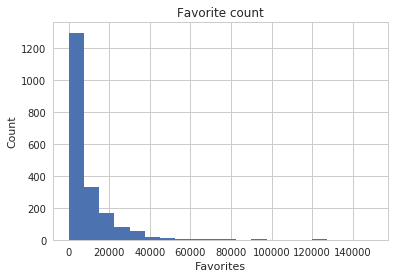

In [381]:
# favorite_count

df_clean.hist(column='favorite_count', bins=20, range=(0,150000));
plt.title('Favorite count')
plt.xlabel('Favorites')
plt.ylabel('Count');

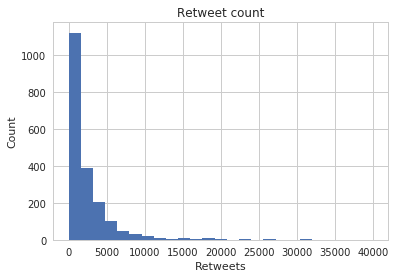

In [382]:
# retweeted count

df_clean.hist(column='retweet_count', bins=25, range=(0,40000));
plt.title('Retweet count')
plt.xlabel('Retweets')
plt.ylabel('Count');

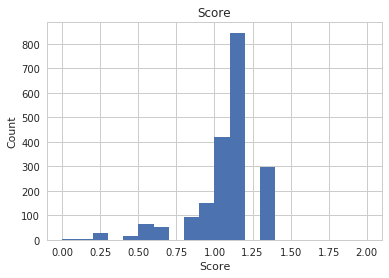

In [383]:
# score

df_clean.hist(column='score', bins=20, range=(0,2));
plt.title('Score')
plt.xlabel('Score')
plt.ylabel('Count');

In [384]:
# analyze score
df_clean.score.describe()

count    1979.000000
mean        1.169833
std         4.082035
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: score, dtype: float64

In [385]:
# analyze retweets
df_clean.retweet_count.describe()

count     1979.000000
mean      2658.517938
std       4738.153580
min         12.000000
25%        588.000000
50%       1271.000000
75%       3041.000000
max      83604.000000
Name: retweet_count, dtype: float64

In [386]:
# analyze favorite count
df_clean.favorite_count.describe()

count      1979.000000
mean       8754.540677
std       12830.128712
min          78.000000
25%        1867.000000
50%        3953.000000
75%       10928.500000
max      164220.000000
Name: favorite_count, dtype: float64

In [387]:
df_clean['retweet_count'].corr(df_clean['score'])

0.022868896959371086

In [388]:
df_clean['favorite_count'].corr(df_clean['score'])

0.021854799853515301

In [389]:
df_clean['retweet_count'].corr(df_clean['favorite_count'])

0.92955078928087997

In [390]:
# to check dog stages
stage = df_clean.dog_type.value_counts()

In [391]:
stage

pupper            203
doggo              63
puppo              22
doggo, pupper       9
floofer             7
doggo, floofer      1
puppo, doggo        1
Name: dog_type, dtype: int64

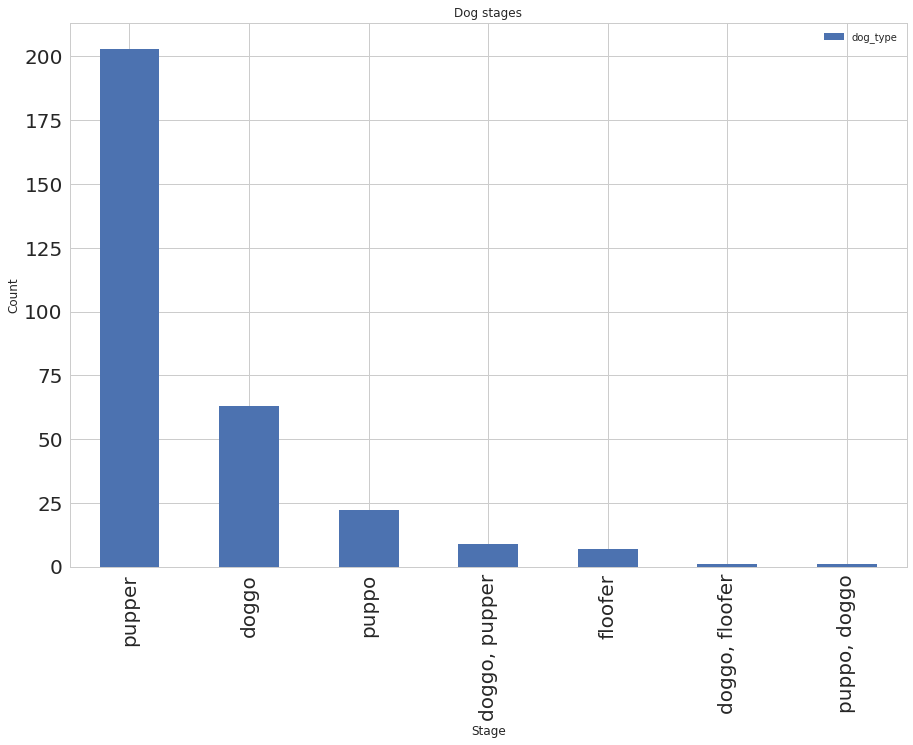

In [392]:
ax = (stage).plot(kind='bar', title ="Dog stages", figsize=(15, 10), legend=True, fontsize=20)
ax.set_xlabel("Stage", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

In [393]:
df_clean.corr()

,tweet_id,score,retweet_count,favorite_count
tweet_id,1.000000,0.028228,0.384442,0.612016
score,0.028228,1.000000,0.022869,0.021855
retweet_count,0.384442,0.022869,1.000000,0.929551
favorite_count,0.612016,0.021855,0.929551,1.000000


Text(0.5,1,'Correlation Matrix')

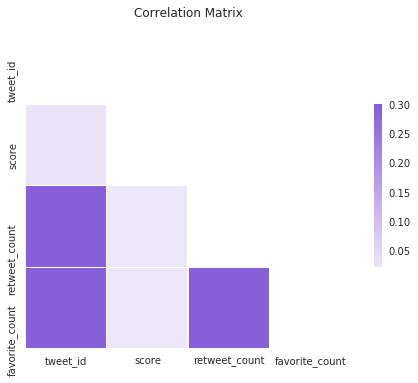

In [394]:
#https://seaborn.pydata.org/examples/many_pairwise_correlations.html

sns.set(style="whitegrid")


# Compute the correlation matrix
corr = df_clean.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(150, 275, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Correlation Matrix')

Conclusion:
    - as we see there is very strong 0.93 correlation between `retweet_count` and `favorite_count`, which makes sense
    - there is almost no correlation between retweet_count` and `favorite_count` and the `score`
    - the most 5 popular dog names are: 
        Lucy        9
        Cooper      9
        Oliver      8
        Tucker      8
        Penny       8
     - the most 5 popular breeds are:
        golden_retriever             139
        Labrador_retriever            95
        Pembroke                      88
        Chihuahua                     79
        pug                           54
     Which is true as retriever is considered everywhere as the most popular dog in US.
     
     - Stage: the favorite stage is `pupper` though we don't have sufficient data for dipper analysis
     - Score: the mean is 1.17 and mode is between 1 and 1.25
     - Retweet_count: mean is 2.7 thousand and mode is in range 0-1 thousand
     - Favorite_count: mean is 8.7 thousand and mode is in range 0-5 thousand
    